In [1]:
from __future__ import division  
import matplotlib.pyplot as plt
   
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/LucaZancato/ML2020-2021/main/ccpp_Data_clean2018.csv"
data = np.array(pd.read_csv(url, sep=';'))

In [3]:
dataDescription = stats.describe(data)
print(dataDescription)

data.shape


DescribeResult(nobs=5281, minmax=(array([  1.81,  25.36, 992.89,  25.56, 420.26]), array([  37.11,   81.56, 1033.29,  100.16,  495.23])), mean=array([  19.67317553,   54.31940163, 1013.22432115,   73.38815187,
        454.31701004]), variance=array([ 56.0327041 , 161.7733201 ,  35.2083789 , 217.43618617,
       291.84459771]), skewness=array([-0.13713412,  0.19522075,  0.24934713, -0.43467097,  0.29846615]), kurtosis=array([-1.04662553, -1.45165813,  0.01128758, -0.43044229, -1.05785395]))


(5281, 5)

In [4]:
df=pd.read_csv(url, sep=';')
df.head()

,AT,V,AP,RH,PE
0,23.97,63.86,1018.09,57.62,441.65
1,20.63,43.77,1010.71,62.34,448.25
2,23.63,73.18,1012.29,88.81,437.70
3,24.84,71.73,1009.84,82.41,436.36
4,25.76,71.06,1007.93,90.40,433.75


In [5]:
# Created a function that takes a data set as input and returns 3 data sets: S_t, S_val, S_test.
# Each data set is represented as a matrix m \times d (numpy ndarray), where m is the amount of data and d is
# number of features.
def create_train_val_test_datasets(data : np.ndarray, m_t : int, m_val : int, m_test : int):
    
    data_randon = np.random.permutation(data)
    S_t = data_randon[:m_t]
    S_val = data_randon[m_t:m_val+m_t]
    S_test = data_randon[m_val+m_t:]
    
    return S_t, S_val, S_test

In [6]:
# Let's split the data into 3 datasets
m = data.shape[0]
m_t, m_val = m // 3, m // 3
m_test = m - m_t - m_val
S_t, S_val, S_test = create_train_val_test_datasets(data, m_t, m_val, m_test)

In [7]:
# Now I get input data (X) and output data (y, variable to be predicted) from S_t, S_val, S_test 
x_train, y_train = S_t[:,:-1],    S_t[:,-1].reshape(-1,1) # We use reshape so that we will get a column vector
x_val,   y_val   = S_val[:,:-1],  S_val[:,-1].reshape(-1,1)
x_test,  y_test  = S_test[:,:-1], S_test[:,-1].reshape(-1,1)
print(f"Training input data size:    {x_train.shape}")
print(f"Training output data size:   {y_train.shape}")
print(f"Validation input data size:  {x_val.shape}")
print(f"Validation output data size: {y_val.shape}")
print(f"Test input data size:        {x_test.shape}")
print(f"Test output data size:       {y_test.shape}")
# Let's get the number of features
d = x_train.shape[1]

Training input data size:    (1760, 4)
Training output data size:   (1760, 1)
Validation input data size:  (1760, 4)
Validation output data size: (1760, 1)
Test input data size:        (1761, 4)
Test output data size:       (1761, 1)


In [8]:
# Let's standardize the our data in this case we only standardize input data X
from sklearn import preprocessing
# Find the right scaler (we are allowed to use only training data in this step)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
print(f"Mean of the training input data:   {x_train.mean(axis=0)}")
print(f"Std of the training input data:    {x_train.std(axis=0)}")
# Apply the tranformation we got with the training dataset both to the validation and test ones
x_val = scaler.transform(x_val) # use the same transformation on validation data
print(f"Mean of the validation input data: {x_val.mean(axis=0)}")
print(f"Std of the validation input data:  {x_val.std(axis=0)}")
x_test = scaler.transform(x_test) # use the same transformation on test data
print(f"Mean of the test input data:       {x_test.mean(axis=0)}")
print(f"Std of the test input data:        {x_test.std(axis=0)}")

Mean of the training input data:   [ 2.37789586e-15 -1.43931584e-15  6.63303377e-14 -4.53683808e-15]
Std of the training input data:    [1. 1. 1. 1.]
Mean of the validation input data: [-0.0708118  -0.07889898  0.00580952  0.05072868]
Std of the validation input data:  [1.00655404 0.99272612 1.00297901 0.98148732]
Mean of the test input data:       [ 0.0012443  -0.03963863 -0.06000543  0.01534853]
Std of the test input data:        [1.00401176 1.0026715  0.98100981 0.95840992]


In [9]:
# Let's wrap the code above in single function since we will need it many times
def data_preprocessing(train_data : np.ndarray, val_data : np.ndarray, test_data : np.ndarray, scaler): 

    fitted_scaler = scaler.fit(train_data)
    return (fitted_scaler.transform(train_data), fitted_scaler.transform(val_data), 
            fitted_scaler.transform(test_data), fitted_scaler)

# Let's normalize also the output data
y_train, y_val, y_test, y_fitted_scaler = data_preprocessing(train_data=y_train, val_data=y_val, test_data=y_test, 
                                                             scaler=preprocessing.StandardScaler())
print(f"Mean of the training output data:   {y_train.mean(axis=0)}")
print(f"Std of the training output data:    {y_train.std(axis=0)}")
print(f"Mean of the validation output data: {y_val.mean(axis=0)}")
print(f"Std of the validation output data:  {y_val.std(axis=0)}")
print(f"Mean of the test output data:       {y_test.mean(axis=0)}")
print(f"Std of the test output data:        {y_test.std(axis=0)}")

Mean of the training output data:   [-2.1800743e-15]
Std of the training output data:    [1.]
Mean of the validation output data: [0.06158379]
Std of the validation output data:  [1.00111778]
Mean of the test output data:       [0.00245971]
Std of the test output data:        [0.99207548]


In [10]:
def data_splitting_and_preprocessing(data : np.ndarray, m_t : int, m_val : int, m_test : int, 
                                     input_scaler, output_scaler):
    # Created training, validation, test datasets
    S_t, S_val, S_test = create_train_val_test_datasets(data=data, m_t=m_t, m_val=m_val, m_test=m_test)
    # Split datasets in input (x) and output (y)
    x_train, y_train = S_t[:,:-1],    S_t[:,-1].reshape(-1,1)
    x_val,   y_val   = S_val[:,:-1],  S_val[:,-1].reshape(-1,1)
    x_test,  y_test  = S_test[:,:-1], S_test[:,-1].reshape(-1,1)
    # Normalize input data (using a transformation based only on the training input data)
    x_train, x_val, x_test, fitted_I_scaler = data_preprocessing(train_data=x_train, val_data=x_val, test_data=x_test, 
                                                                 scaler=input_scaler)
    y_train, y_val, y_test, fitted_O_scaler = data_preprocessing(train_data=y_train, val_data=y_val, test_data=y_test, 
                                                                 scaler=output_scaler)
    return x_train, y_train, x_val, y_val, x_test, y_test, fitted_I_scaler, fitted_O_scaler

In [11]:
# Created a function to compute the pseudo-inverse (as showed in the previous cell) of a general rectangular matrix 
def pseudoinverse(A : np.ndarray, threshold : float=1e-10) -> np.ndarray: # this cool rigth arrow is used to give info on the returned type

    U, S, VT = np.linalg.svd(A, full_matrices = False)
    S_inverse = np.where(np.abs(S)<threshold,0,1/S)
    A_pseudo_inverse = VT.T @ np.diag(S_inverse) @ U.T
    return A_pseudo_inverse

In [12]:
x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test  = np.hstack((np.ones((x_test.shape[0],1)),  x_test))
x_val  = np.hstack((np.ones((x_val.shape[0],1)),  x_val))

In [13]:
# I wrote a function which computes the optimal parameters w_hat, solution to the LS problem described earlier.
# We assume w_hat contains the bias term b (as described in class).
def compute_LS_optimal_ERM_coefficients(x_train : np.ndarray, y_train : np.ndarray) -> np.ndarray:
    
    w_hat = pseudoinverse(x_train.T @ x_train) @ x_train.T @ y_train
    return w_hat

w_hat = compute_LS_optimal_ERM_coefficients(x_train, y_train)
print(f"w_hat \n {w_hat}")

w_hat 
 [[-2.59514632e-15]
 [-8.49031015e-01]
 [-1.90261088e-01]
 [ 2.39039419e-02]
 [-1.31649342e-01]]


In [14]:
# I use the numpy least squares solver to find the optimal parameter w_hat, I expect
# w_hat to include the bias term b.

w_hat_np = np.linalg.lstsq(x_train, y_train, rcond = -1)[0]
rss_np = np.linalg.lstsq(x_train, y_train, rcond = -1)[1]

In [15]:
# Let's assess model performance. 
# We are going to start with training error (both for our implementation and the numpy one)
# And then we will evaluate test error 
# For now we will not use the validation dataset (it is usually used to choose the optimal hyper-parameters)

def linear_predictions(w_hat : np.ndarray, x_data : np.ndarray) -> np.ndarray:
    

    if w_hat.shape !=(x_data.shape[1],1):
        x_data = np.hstack((np.ones((x_data.shape[0], 1)),x_data))
    prediction = x_data @ w_hat
    return prediction

def rss(target_output : np.ndarray, model_output : np.ndarray) -> np.float64:
    '''
    Compute the residual sum of squares given two vectors: target outputs and model predictions
   
    '''

    rss=0
    for i in range(m_t):
        rss+=(target_output[i]-model_output[i])**2
    return float(rss) 

def cod(target_output : np.ndarray, model_output : np.ndarray) -> np.float64:
    '''
        Compute the coefficient of determination (COD) given two vectors: target outputs and model predictions
    '''
    
    sum_y_y_mean=0
    y_mean = np.mean(target_output)
    for i in range(m_t):
        sum_y_y_mean+=(target_output[i] - y_mean)**2
        cod = 1- rss(target_output,model_output)/sum_y_y_mean
    return float(cod)

In [16]:
# Evaluate RSS, COD and empirical LS loss on the training dataset

predictions_train = linear_predictions(w_hat, x_train)                
rss_hand_train = rss(y_train,predictions_train)
cod_hand_train = cod(y_train,predictions_train) 
ls_loss_hand_train = rss_hand_train/m_t               

print(f"rss on train dataset from numpy: {rss_np[0]:.4f}")
print(f"Metrics on train dataset: rss={rss_hand_train:.4f}, cod={cod_hand_train:.4f}, loss={ls_loss_hand_train:.4f}")


# Evaluate RSS, COD and empirical LS loss on the test dataset

predictions_test = linear_predictions(w_hat, x_test)               
rss_hand_test, cod_hand_test = rss(y_test,predictions_test), cod(y_test,predictions_test) 
ls_loss_hand_test = rss_hand_test/m_test                

print(f"Metrics on test  dataset: rss={rss_hand_test:.4f}, cod={cod_hand_test:.4f}, loss={ls_loss_hand_test:.4f}")

rss on train dataset from numpy: 117.2736
Metrics on train dataset: rss=117.2736, cod=0.9334, loss=0.0666
Metrics on test  dataset: rss=132.0625, cod=0.9236, loss=0.0750


(<matplotlib.legend.Legend at 0x1e97675e220>,
 Text(0.5, 1.0, 'Error Distributions'))

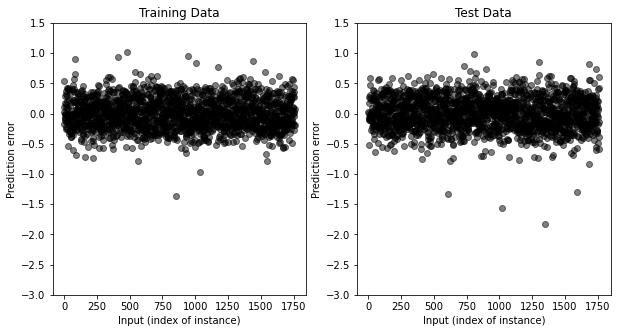

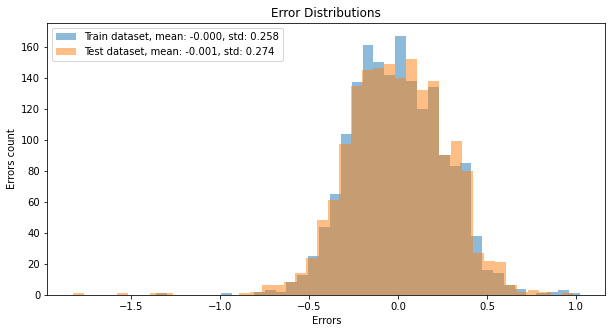

In [17]:
# plot predictions and historgrams of errors (the model has uniform errors)
def plot_model_prediction_error(target_output : np.ndarray, model_output : np.ndarray, ax, plt_info : dict):
    ax.plot(target_output-model_output, 'ko', alpha=0.5)
    ax.set_xlabel('Input (index of instance)')
    ax.set_ylabel('Prediction error')
    ax.set_title(plt_info['title'])
    ax.set_ylim([-3, 1.5])

def plot_error_distributions(target_output : np.ndarray, model_output : np.ndarray, ax, plt_info : dict):
    errors = target_output - model_output
    label = f"{plt_info['dataset']} dataset, mean: {errors.mean():.3f}, std: {errors.std():.3f}"
    ax.hist(errors, bins='auto', alpha=0.5, label=label)
    ax.set_xlabel('Errors')
    ax.set_ylabel('Errors count')

# Plot model predictions vs true outputs
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot_model_prediction_error(y_train, predictions_train, axes[0], {'title': 'Training Data'})
plot_model_prediction_error(y_test, predictions_test, axes[1], {'title':'Test Data'})

# Plot error distributions
fig, axes = plt.subplots(1, 1, figsize=(10,5))
plot_error_distributions(y_train, predictions_train, axes, {'dataset': 'Train'})
plot_error_distributions(y_test, predictions_test, axes, {'dataset': 'Test'})
axes.legend(), axes.set_title('Error Distributions')


In [18]:
# Compute confidence intervals [-delta_0,+delta_0] of the linear model on the test dataset, i.e. with x_0 above
# taking values in x_test

# Get t_percentile from scipy.stats
from scipy.stats import t
alpha = 0.05
df = m_t-d-1
t_percentile = t.ppf(1-alpha/2,df) 

# Estimate sigma_2_hat
sigma_2_hat_sum = 0

for i in range(m_t):
    sigma_2_hat_sum +=(y_test[i] - w_hat.T @x_test[i])**2
    
    
sigma_2_hat = (1/(df))*sigma_2_hat_sum
    

# In this case X^TX is invertible, therefore the pseudoinverse and the inverse are exatly the same.

ci_O = np.ones((1761,2))
for i in range(ci_O.shape[0]):
    ci_O[i][0] =  + np.sqrt(sigma_2_hat)*t_percentile*np.sqrt(x_test[i] @ pseudoinverse(x_train.T @ x_train)@x_test[i].T+1)
    ci_O[i][1] =  - np.sqrt(sigma_2_hat)*t_percentile*np.sqrt(x_test[i] @ pseudoinverse(x_train.T @ x_train)@x_test[i].T+1)

print(f"These are the output confidence intervals \n {ci_O} \n of shape {ci_O.shape}")

These are the output confidence intervals 
 [[ 0.538382   -0.538382  ]
 [ 0.53896765 -0.53896765]
 [ 0.53935607 -0.53935607]
 ...
 [ 0.53859857 -0.53859857]
 [ 0.53847049 -0.53847049]
 [ 0.53867385 -0.53867385]] 
 of shape (1761, 2)


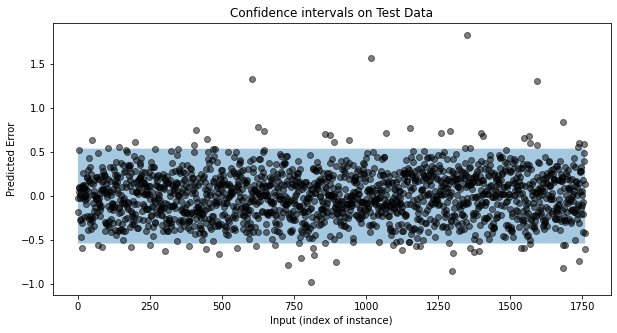

In [19]:
def plot_model_predictions_error_vs_CI(target_output : np.ndarray, model_output : np.ndarray, c_i : np.ndarray, ax, 
                                 plt_info : dict):
    ax.plot(model_output-target_output, 'ko', alpha=0.5)
    ax.fill_between(range(model_output.shape[0]),c_i[:,0], c_i[:,1], alpha=0.4)

    ax.set_xlabel('Input (index of instance)')
    ax.set_ylabel('Predicted Error')
    ax.set_title(plt_info['title'])

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plot_model_predictions_error_vs_CI(y_test, predictions_test, ci_O, ax, {'title': 'Confidence intervals on Test Data'})


[(0,), (1,), (2,), (3,), (4,)]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]
[(0, 1, 2, 3, 4)]
Best subset of features according to training: (1, 2, 3, 4)
Best subset of features according to validation: (0, 1, 2, 3, 4)
Test metrics for the best model: rss 132.0625, cod 0.9236


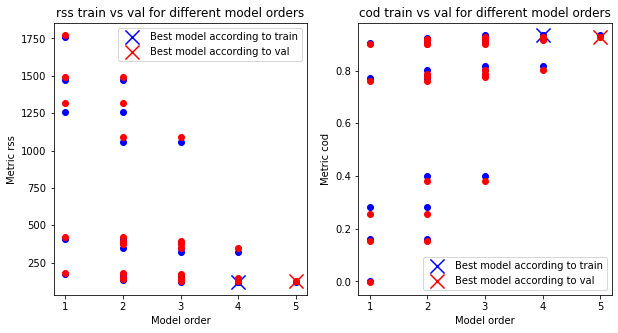

In [20]:
from itertools import combinations
from collections import defaultdict

# Let's use the functions we built up to now to find the best model order according the validation criterions.
# Once we choose the best model order, which is an hyper-parameters we will estimate its generalization
# capability using the test dataset! 

indexes_subset, train_metrics, val_metrics = [], defaultdict(list), defaultdict(list)
for k in range(1, x_train.shape[1] + 1):
    print(list(combinations(list(range(x_train.shape[1])), k)))
    all_combinations_given_k_choices = list(combinations(list(range(x_train.shape[1])), k))
    for indexes in all_combinations_given_k_choices:
        indexes_subset.append(indexes)
        x_train_subset, x_val_subset = x_train[:, indexes], x_val[:, indexes]
        w_hat = compute_LS_optimal_ERM_coefficients(x_train_subset, y_train)
        # Predict Training metrics
        predictions_train = linear_predictions(w_hat, x_train_subset)
        rss_hand_train, cod_hand_train = rss(y_train, predictions_train), cod(y_train, predictions_train)
        train_metrics['rss'].append(rss_hand_train)
        train_metrics['cod'].append(cod_hand_train)
        # Predict Generalization metrics (using the validation set)
        predictions_val = linear_predictions(w_hat, x_val_subset)
        rss_hand_val, cod_hand_val = rss(y_val, predictions_val), cod(y_val, predictions_val)
        val_metrics['rss'].append(rss_hand_val)
        val_metrics['cod'].append(cod_hand_val)   

# Let's find which is the best model according to the validation error 
def plot_metric_vs_model_order(indexes_subset, metric_results, ax, plot_info):
    for indexes, metric in zip(indexes_subset, metric_results):
        ax.scatter(len(indexes), metric, color=plot_info['color'])
    # Find best model 
    best_index = np.argmax(metric_results) if plot_info['metric'] == 'cod' else np.argmin(metric_results)
    ax.scatter(len(indexes_subset[best_index]), metric_results[best_index], color=plot_info['color'], marker='x', 
               s=200, label=f"Best model according to {plot_info['dataset']}")

    ax.set_xlabel('Model order')
    ax.set_ylabel(f"Metric {plot_info['metric']}")
    ax.set_title(f"{plot_info['metric']} train vs val for different model orders")
    ax.legend()
    return indexes_subset[best_index]
    
fig, axes = plt.subplots(1,2, figsize=(10, 5))
# RSS metric
best_features_subset_train = plot_metric_vs_model_order(indexes_subset, train_metrics['rss'], axes[0], 
                           {'color': 'blue', 'dataset': 'train', 'metric': 'rss'})
best_features_subset_val = plot_metric_vs_model_order(indexes_subset, val_metrics['rss'], axes[0], 
                           {'color': 'red', 'dataset': 'val', 'metric': 'rss'})
print(f'Best subset of features according to training: {best_features_subset_train}')
print(f'Best subset of features according to validation: {best_features_subset_val}')
# COD metric
plot_metric_vs_model_order(indexes_subset, train_metrics['cod'], axes[1], 
                           {'color': 'blue', 'dataset': 'train', 'metric': 'cod'})
plot_metric_vs_model_order(indexes_subset, val_metrics['cod'], axes[1], 
                           {'color': 'red', 'dataset': 'val', 'metric': 'cod'})

# We now evaluate the best model (you can choose if you prefer COD or RSS as criterion) on the test dataset
w_hat = compute_LS_optimal_ERM_coefficients(x_train[:, best_features_subset_val], y_train)
predictions_test_best = linear_predictions(w_hat, x_test[:,best_features_subset_val])
rss_hand_test_best, cod_hand_test_best = rss(y_test, predictions_test_best), cod(y_test, predictions_test_best)
print(f"Test metrics for the best model: rss {rss_hand_test_best:.4f}, cod {cod_hand_test_best:.4f}")

In [21]:
# Model with five parameters
w_hat = compute_LS_optimal_ERM_coefficients(x_train, y_train)
predictions_test = linear_predictions(w_hat, x_test)
rss_hand_test, cod_hand_test = rss(y_test, predictions_test), cod(y_test, predictions_test)
print(f"Test metrics: rss {rss_hand_test:.4f}, cod {cod_hand_test:.4f}")


from scipy.stats import t
alpha = 0.5
t_percentile = t.ppf(1-alpha/2, m_t-d-1, loc=0, scale = 1)

sigma_2_hat = rss_hand_test/(m_t-d-1)

a = pseudoinverse(x_train.T @ x_train)

ci_O = np.ones((5,2))
for i in range(np.shape(x_test)[1]):
    e = np.array([1.0 if j == i else 0.0 for j in range(5)])
    ci_O[i][0] = w_hat[i] - t_percentile*np.sqrt(sigma_2_hat*e @ a @ e.T)
    ci_O[i][1] = w_hat[i] + t_percentile*np.sqrt(sigma_2_hat*e @ a @ e.T)

print(f"These are the confidence intervals of w_hat \n {ci_O} \n of shape {ci_O.shape}")

Test metrics: rss 132.0625, cod 0.9236
These are the confidence intervals of w_hat 
 [[-0.00441124  0.00441124]
 [-0.86000188 -0.83806015]
 [-0.19911685 -0.18140533]
 [ 0.01852886  0.02927902]
 [-0.13743227 -0.12586642]] 
 of shape (5, 2)
